No. of training examples: 47
No. of testing examples: 12
[[ 1.941636  1.148136  1.      ]
 [ 0.825107  0.231506 -1.      ]
 [ 1.905989  1.410093  1.      ]
 [ 1.076781  1.001061  1.      ]
 [ 0.677795  0.263691 -1.      ]
 [ 1.941636  1.148136  1.      ]
 [ 0.108526  0.255964 -1.      ]
 [ 1.076781  1.001061  1.      ]
 [ 0.677795  0.263691 -1.      ]
 [ 0.825107  0.231506 -1.      ]
 [ 1.905989  1.410093  1.      ]
 [ 0.677795  0.263691 -1.      ]]
Bias: -1.157
Weights: 0.136 0.136
Prediction accuracy on test data:66.66666666666666


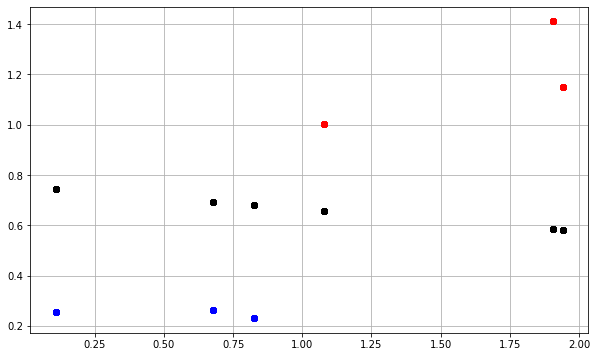

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def process_data():
    
    data = pd.read_csv(r'C:\Users\Dell\Desktop\ML\Dataset.csv')
    
    train_data = data.sample(frac=0.8,random_state=200) 
    test_data = data.drop(train_data.index)
    
    print(f"No. of training examples: {train_data.shape[0]}")
    print(f"No. of testing examples: {test_data.shape[0]}")

    train_data = np.asmatrix(train_data, dtype = 'float64')
    test_data = np.asmatrix(test_data, dtype = 'float64')
    
    return (train_data, test_data)

#training and testing preparation happens

# Perceptron
def pla(data, loop):
    
    attributes = data[:, :-1]  #It is list indexing, it returns all elements [:] except the last one -1
    labels = data[:, -1]       #It is list indexing, it returns all elements [:] except the last one -1
    
    # assign random weights
    weights = np.random.rand(1, attributes.shape[1]+1)
    
    misclassified = [] #Misclassified e per epoch koto data points misclassified holo seta count kore rakhchi
  
    for i in range(loop):
        
        count = 0
        for x, label in zip(attributes, labels):
            
            x = np.insert(x,0,1)
            y = np.dot(weights, x.transpose())
            y_sign = 1.0 if (y > 0) else -1.0
            
            #print(label.item(0,0))
            
            difference = (label[0] - y_sign)
            
            if(difference): # misclassified
                count += 1
                weights += label[0] * x
        
        misclassified.append(count)
    return (weights, misclassified)


def get_scatter_plot(data,weights):
    
    plt.figure(figsize=(10,6))
    plt.grid(True)
    inputs = data[:, :-1]
    targets = data[:, -1]
    #print(inputs)

    for input,target in zip(inputs,targets):
        plt.plot(input[:,0],input[:,1],'ro' if (target == 1.0) else 'bo')
        
    slope = -(weights[0][0]/weights[0][2])/(weights[0][0]/weights[0][1])
    intercept = -weights[0][0]/weights[0][2]
    
    for i in data[:, 0]:
        #y.append(slope * i + intercept)
        y = (slope*i) + intercept
        plt.plot(i, y,'ko')
    
    #plt.plot(y)

def predict(data, weights):
    
    y = []
    for x in data:
        product = np.dot(weights, x.transpose())
        if product > 0:
            y.append(1.0)
        else:
            y.append(-1.0)
    return y

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

def main(): 
    
    train, test = process_data()
    print(test)
        
    # no. of iterations
    loop = 100
    
    weights, misclassified = pla(train, loop)
    
    # display bias, weights and misclassifications
    print('Bias: {0:.3f}'.format(weights[0][0]))
    print('Weights: {0:.3f} {0:.3f}'.format(weights[0][1], weights[0][2]))
    
    """
    if misclassified:
        print('Misclassified points per iteration: ')
        print(misclassified)
    else:
        print('No misclassification occured')
    """
    
    get_scatter_plot(train, weights)
    
    y = predict(test, weights)
    result = accuracy_metric(test[:, -1], y)
    print("Prediction accuracy on test data:{}".format(result))
       
if __name__ == "__main__": 
    main() 